In [1]:
import subprocess
from rpy2.robjects import r
from rc_data_preparation import RcDataPreparation
from rc_pred_ann_model import PredAnnModel

current_data = RcDataPreparation()

def get_genes_list(p_thresh, split_train):
    # Define the R script path
    r_script = "rc_get_diff_genes.r"
    
    # Build the command to run the R script
    command = ["Rscript", r_script, str(p_thresh), str(split_train)]
    
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Check if the R script ran successfully
    if result.returncode == 0:
        print("R script executed successfully.")
    
        # Read the generated file
        rds_path = '/tmp/work/RCproject_code/sean_ann_python/ann_gene_set.rds'
        current_genes = r.readRDS(rds_path)
        print(len(current_genes))
        
    else:
        print("Error in R script execution:")
        print(result.stderr)

    return(current_genes.tolist())

current_genes = get_genes_list(0.07, True)
# current_model = PredAnnModel(current_data,current_genes)

2025-01-27 08:12:32.174513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians,

Data successfully loaded.
R script executed successfully.
599


In [2]:
# current_gene_list = 'de_intersect_plus_bulk_genes'

# # Load the RDS file
# rds_path = '/tmp/work/RCproject/gene_lists.rds'
# rds_data = r.readRDS(rds_path)

# # Extract the names of the lists and their contents
# gene_lists = {}
# for name, item in zip(rds_data.names, rds_data):
#     # Each 'item' is a list associated with the 'name'
#     inner_list = list(item)  # Convert the inner R list to a Python list
#     gene_lists[name] = inner_list

# # Now `python_data` is a dictionary with names as keys and lists as values
# print(gene_lists.keys())

# current_genes = gene_lists[current_gene_list]

# print(len(current_genes))

In [20]:
help(RcDataPreparation)

Help on class RcDataPreparation in module rc_data_preparation:

class RcDataPreparation(builtins.object)
 |  RcDataPreparation(data_dir='/tmp/work/RCproject/GEO_singlecellexperiment.rds', test_set_size=0.1, simplify_categories=True, random_seed=1)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data_dir='/tmp/work/RCproject/GEO_singlecellexperiment.rds', test_set_size=0.1, simplify_categories=True, random_seed=1)
 |      Initializes the RcDataPreparation class with specified parameters.
 |      
 |      Parameters:
 |      - data_dir (str): Path to the RDS file used for building the model.
 |      - test_set_size (float): Fraction of data to be used as a test set (default: 0.1).
 |      - simplify_categories (bool): Whether to simplify categories in the dataset (default: True).
 |      - random_seed (int): Seed for reproducible dataset splits (default: 1).
 |  
 |  add_meta_data(self)
 |      Adds numerical labels and combinations of technology and outcomes to metadata.
 |  
 | 

In [19]:
RcDataPreparation.__dict__

mappingproxy({'__module__': 'rc_data_preparation',
              '__init__': <function rc_data_preparation.RcDataPreparation.__init__(self, data_dir='/tmp/work/RCproject/GEO_singlecellexperiment.rds', test_set_size=0.1, simplify_categories=True, random_seed=1)>,
              'retrieve_data': <function rc_data_preparation.RcDataPreparation.retrieve_data(self)>,
              'filter_data': <function rc_data_preparation.RcDataPreparation.filter_data(self)>,
              'simplify_the_categories': <function rc_data_preparation.RcDataPreparation.simplify_the_categories(self)>,
              'encode_labels': <function rc_data_preparation.RcDataPreparation.encode_labels(self)>,
              'add_meta_data': <function rc_data_preparation.RcDataPreparation.add_meta_data(self)>,
              'retrieve_all_genes': <function rc_data_preparation.RcDataPreparation.retrieve_all_genes(self)>,
              'scale_data': <function rc_data_preparation.RcDataPreparation.scale_data(self)>,
          

In [3]:
current_genes = get_genes_list(0.01, True)
current_model = PredAnnModel(current_data,current_genes, num_epochs = 200)

test_accuracy_list = current_model.test_accuracy_list # list of metrics for evaluating the model
test_auc_list = current_model.test_auc_list # list of metrics for evaluating the model
train_accuracy_list = current_model.train_accuracy_list # list of metrics for evaluating the model

print(max(test_accuracy_list))
print(max(test_auc_list))
print(max(train_accuracy_list))

R script executed successfully.
55
Epoch 0, Average Outcome Loss: 0.7156119021502408, Average Accuracy: 0.48863636363636365, Test AUC: 0.5000, Test Accuracy: 0.6341
Epoch 100, Average Outcome Loss: 0.4514216997406699, Average Accuracy: 0.7840909090909091, Test AUC: 0.4974, Test Accuracy: 0.6098
tf.Tensor(0.73170733, shape=(), dtype=float32)
0.6948717948717948
0.9204545454545454


In [9]:
import pandas as pd

pvals = [0.01 * (i + 1) for i in range(20)]  # Adjust range for the number of values

p_val_perf_df = pd.DataFrame(columns = ['pval','test_auc'])

i = 0

for p_val in pvals:
    current_genes = get_genes_list(p_val, True)
    for x in range(3): 
        print('current pval is:')
        print(p_val)
        current_model = PredAnnModel(current_data,current_genes, num_epochs = 100)
        
        test_accuracy_list = current_model.test_accuracy_list # list of metrics for evaluating the model
        test_auc_list = current_model.test_auc_list # list of metrics for evaluating the model
        train_accuracy_list = current_model.train_accuracy_list # list of metrics for evaluating the model
            
        print(max(test_accuracy_list))
        print(max(test_auc_list))
        print(max(train_accuracy_list))
    
    
        p_val_perf_df.loc[i] = [p_val, max(test_auc_list)]
        i += 1

p_val_perf_df.to_csv('pval_series_auc.csv', index=False)


R script executed successfully.
55
current pval is:
0.01
Epoch 0, Average Outcome Loss: 0.8186877532438799, Average Accuracy: 0.5, Test AUC: 0.5000, Test Accuracy: 0.3659
tf.Tensor(0.68292683, shape=(), dtype=float32)
0.6897435897435897
0.7727272727272727
current pval is:
0.01
Epoch 0, Average Outcome Loss: 0.8378696658394553, Average Accuracy: 0.5, Test AUC: 0.5000, Test Accuracy: 0.3659
tf.Tensor(0.68292683, shape=(), dtype=float32)
0.6923076923076923
0.8238636363636364
current pval is:
0.01
Epoch 0, Average Outcome Loss: 0.7379782633347944, Average Accuracy: 0.5, Test AUC: 0.6667, Test Accuracy: 0.6341
tf.Tensor(0.6585366, shape=(), dtype=float32)
0.6692307692307692
0.8238636363636364
R script executed successfully.
137
current pval is:
0.02
Epoch 0, Average Outcome Loss: 0.689532382921739, Average Accuracy: 0.5454545454545454, Test AUC: 0.5000, Test Accuracy: 0.3659
tf.Tensor(0.6585366, shape=(), dtype=float32)
0.7307692307692308
0.7784090909090909
current pval is:
0.02
Epoch 0, Av

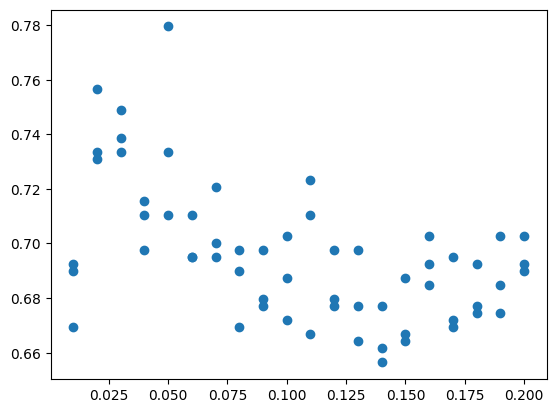

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(p_val_perf_df['test_auc'], p_val_perf_df['pval'])
plt.show()

In [ ]:
# pvals = [0.005 * (i + 1) for i in range(40)]  # Adjust range for the number of values

# for p_val in pvals:
#     print('current pval is:')
#     print(p_val)
#     current_genes = get_genes_list(p_val, True)
#     current_model = PredAnnModel(current_data,current_genes, num_epochs = 1000)
    
#     test_accuracy_list = current_model.test_accuracy_list # list of metrics for evaluating the model
#     test_auc_list = current_model.test_auc_list # list of metrics for evaluating the model
#     train_accuracy_list = current_model.train_accuracy_list # list of metrics for evaluating the model
    
#     print(max(test_accuracy_list))
#     print(max(test_auc_list))
#     print(max(train_accuracy_list))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# After training, plot the metrics

frequency_counts = pd.Series(current_data.y_test_outcome).value_counts()
test_chance_level = frequency_counts[0]/len(current_data.y_test_outcome)

frequency_counts = pd.Series(current_data.y_train_outcome).value_counts()
train_chance_level = frequency_counts[0]/len(current_data.y_train_outcome)

fig, axs = plt.subplots(3, 1, figsize=(12, 6))

x_values = np.arange(1, len(train_accuracy_list) + 1) * current_model.report_frequency

# Plot train accuracy
axs[0].plot(x_values, train_accuracy_list, label='Training Accuracy', color='blue')
axs[0].axhline(train_chance_level, color='black',linestyle ='--')
axs[0].set_title('Training set accuracy over epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Training Accuracy')
axs[0].grid()
axs[0].legend()

# Plot test accuracay
axs[1].plot(x_values, test_accuracy_list, label='Test Accuracy', color='orange')
axs[1].axhline(test_chance_level, color='black',linestyle ='--')
axs[1].set_title('Test set accuracy over epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Test Accuracy')
axs[1].grid()
axs[1].legend()

# Plot test accuracay
axs[2].plot(x_values, test_auc_list, label='Test AUC', color='orange')
# axs[2].axhline(0.5, color='black',linestyle ='--')
axs[2].set_title('Test set AUC over epochs')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Test AUC')
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()